## Linear models

## Part A- Linear Regression

### Reading Data

In [68]:

import pandas as pd

#file_path = '/path/hw1_q1_data.csv'
file_path = 'hw1_q1_data.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

In [69]:
df.head()
# data: consists of only necessary attributes including target
data = df.drop(['name'], axis = 1)

df.columns

Index(['name', 'stamina', 'attack_value', 'defense_value', 'capture_rate',
       'flee_rate', 'spawn_chance', 'combat_point'],
      dtype='object')

### (A-i) (5 points) Data exploration:

In [70]:
# Import required packages here
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import pearsonr

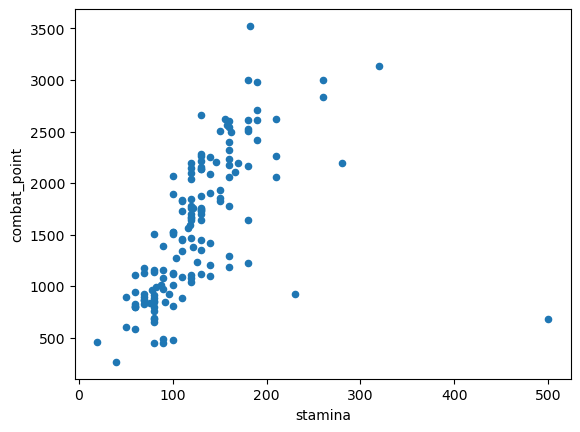

Correlation of stamina vs combat point: 0.5828317032229264


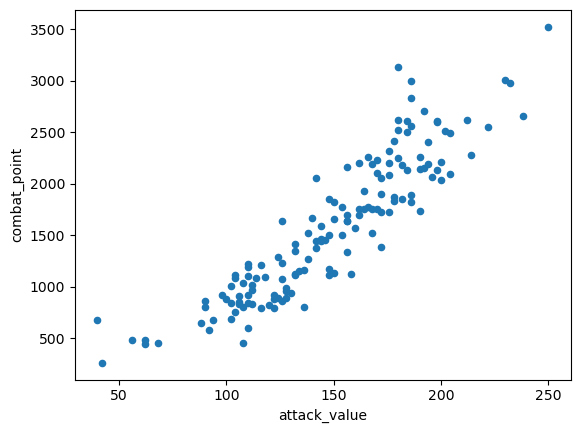

Correlation of attack_value vs combat point: 0.9075315401042738


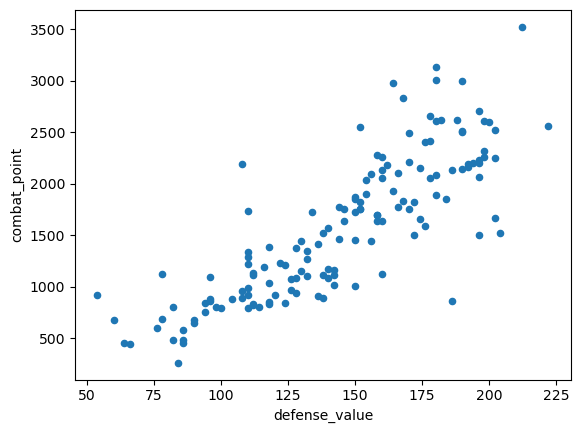

Correlation of defense_value vs combat point: 0.8262293053572933


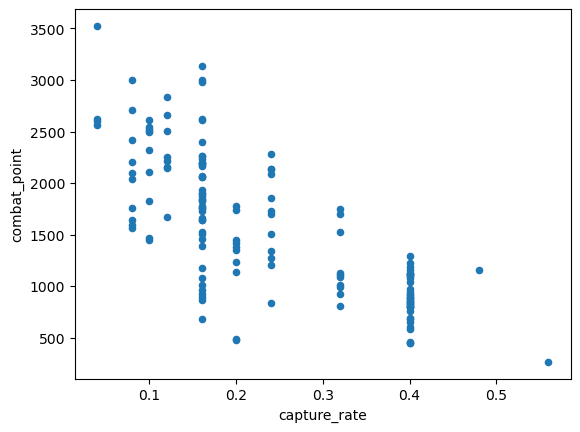

Correlation of capture_rate vs combat point: -0.7430078083529389


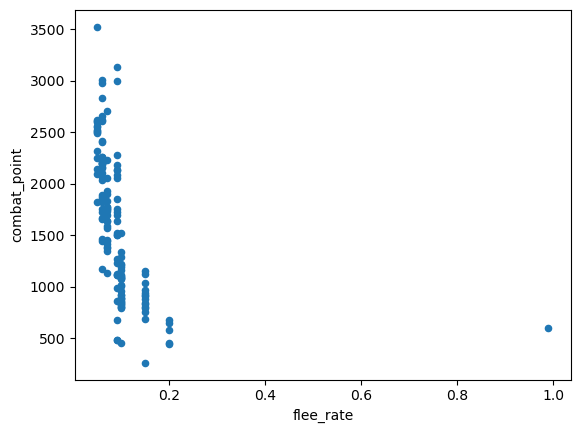

Correlation of flee_rate vs combat point: -0.40703421142159657


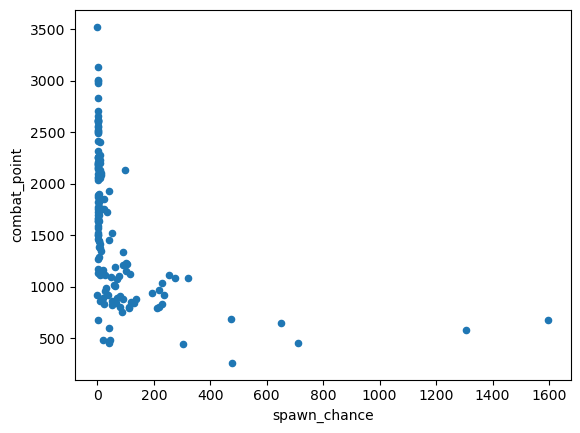

Correlation of spawn_chance vs combat point: -0.42132699465983625


In [71]:
def get_pearson_coeff(feature1, feature2):
  '''
    given 2 feature names return the Pearson’s correlation coefficient between them
  '''
  new_df = df[[feature1, feature2]]
  return new_df[feature1].corr(new_df[feature2])

def plot_scatter(feature1, feature2):
  '''
    Plot a 2D Scatter Plot between the 2 features, make sure to label the plots properly
  '''
  new_df = df[[feature1, feature2]]
  new_df.plot(x = feature1, y = feature2, kind = 'scatter')
  plt.show()

#plot 2D: features vs outcome
for i in data.columns[:-1]:
    plot_scatter(i, 'combat_point')
    print("Correlation of " + i + " vs "+ "combat point: " + str(get_pearson_coeff(i, 'combat_point')))

In [72]:

data.corr()
feature_cor2 = data.corr()[-1:]
feature_cor = feature_cor2.drop(['combat_point'], axis = 1)
coeff_list =  feature_cor.values.tolist()[0]# This list stores the Pearson correlation coefficient

data.drop(['combat_point'], axis = 1)
attributes = data.drop(['combat_point'], axis = 1)
features_list = attributes.columns.tolist() # This list stores the features in the data

data_exploration1_result = pd.DataFrame()
data_exploration1_result['feature'] = features_list
data_exploration1_result['corr'] = coeff_list
data_exploration1_result

,feature,corr
0,stamina,0.582832
1,attack_value,0.907532
2,defense_value,0.826229
3,capture_rate,-0.743008
4,flee_rate,-0.407034
5,spawn_chance,-0.421327


From the above result, it can be said that the most predictive features of the number of combat_point are attack_value (0.907), 
defense_value (0.826) and capture_rate (-0.743). These features have the highest influence on predicting Combat Point, with 
attack_value and defense_value positively correlated and capture_rate negatively correlated with Combat Point.

### Data exploration:

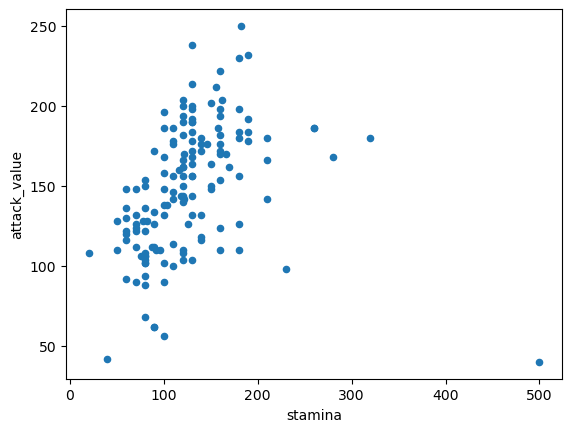

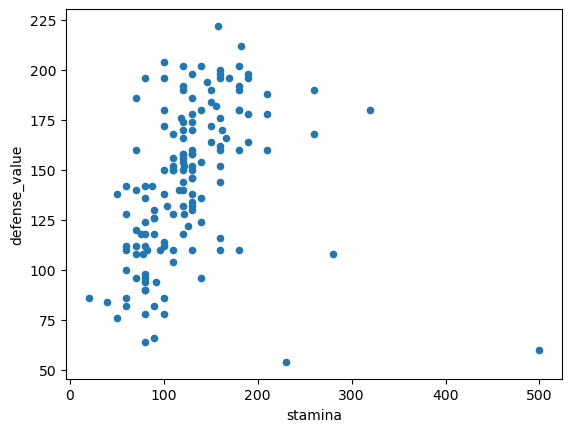

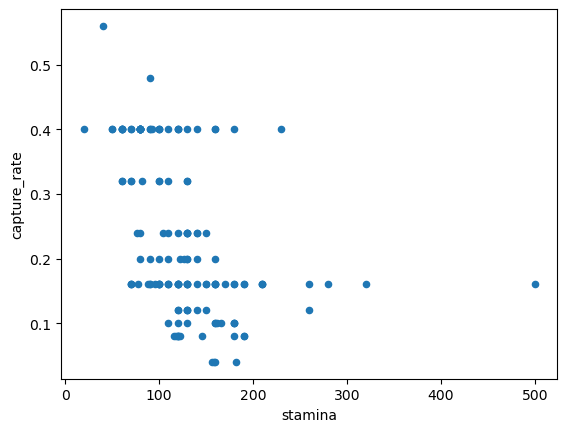

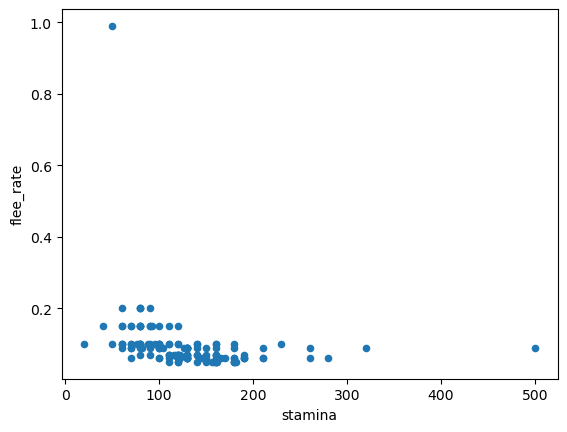

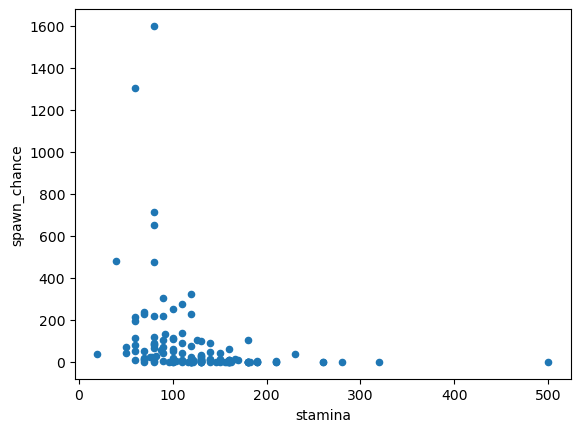

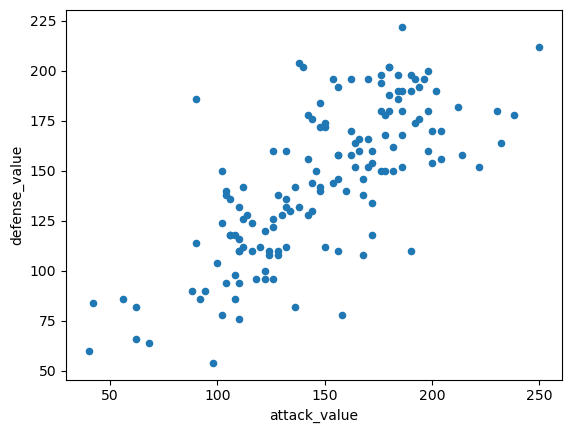

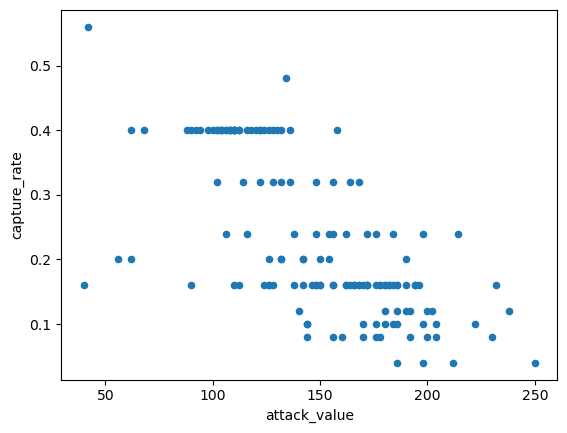

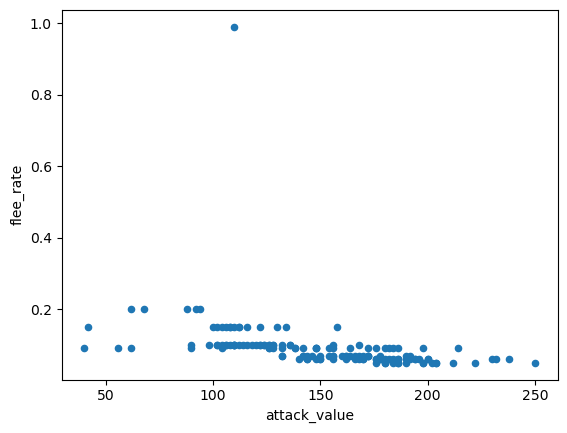

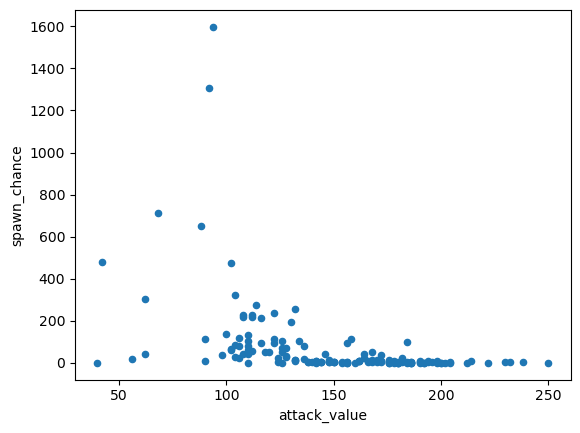

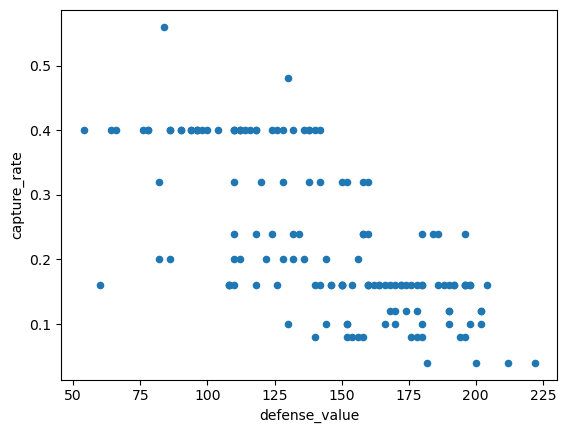

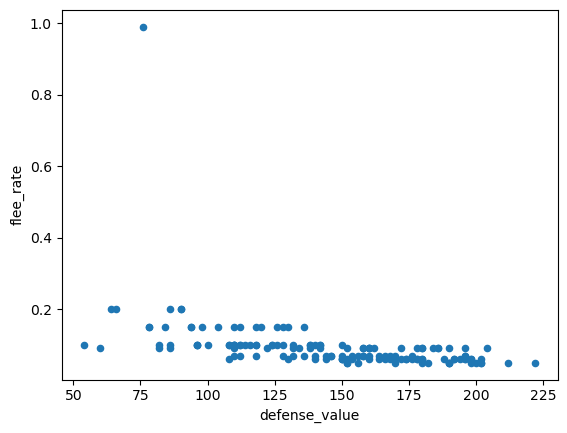

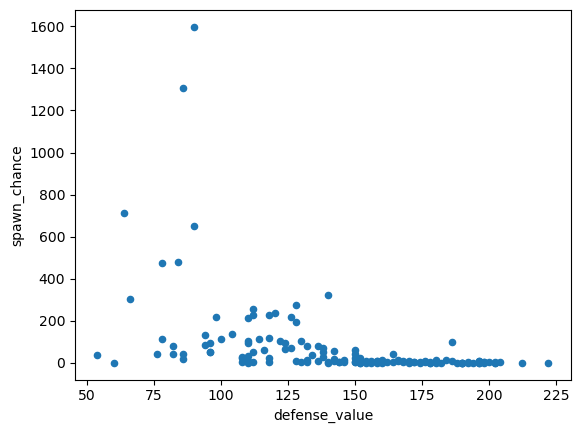

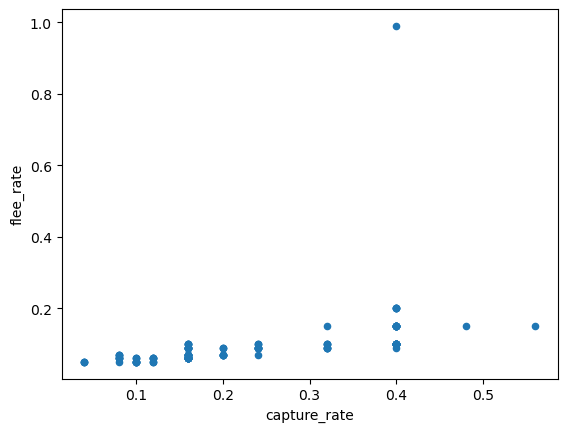

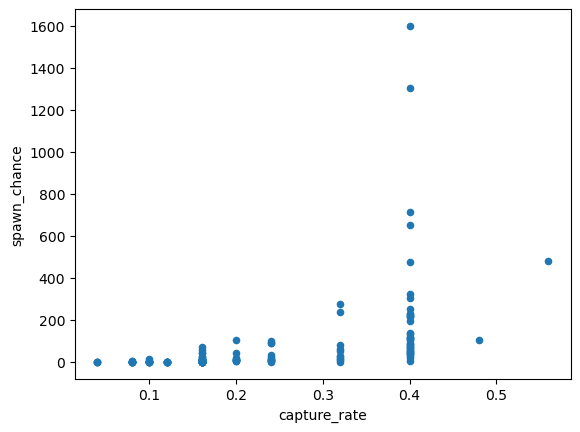

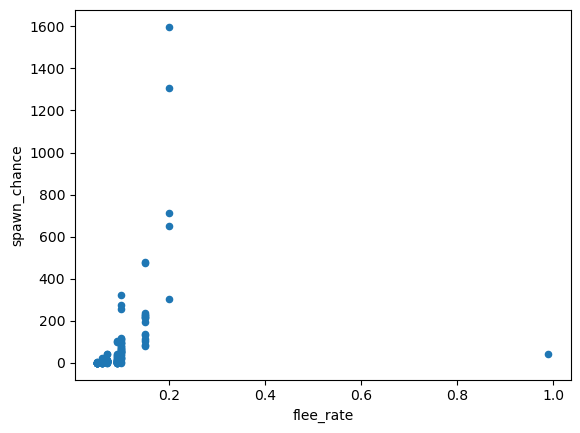

,Feature1,Feature2,corr_coeff
0,stamina,attack_value,0.302995
1,stamina,defense_value,0.302663
2,stamina,capture_rate,-0.446850
3,stamina,flee_rate,-0.271048
4,stamina,spawn_chance,-0.276420
5,attack_value,defense_value,0.736777
6,attack_value,capture_rate,-0.690573
7,attack_value,flee_rate,-0.369064
8,attack_value,spawn_chance,-0.432648
9,defense_value,capture_rate,-0.697266


In [73]:
n = len(features_list)
feature1_list = []
feature2_list = []
coeff_list = [] # This list stores the Pearson correlation values

for i in range(0,n):
  for j in range(i+1, n):

    feature1_list.append(features_list[i])
    feature2_list.append(features_list[j])

    ''' populate coeff_list here '''
    correlation, _ = pearsonr(df[features_list[i]], df[features_list[j]])
    coeff_list.append(correlation)
    plot_scatter(features_list[i], features_list[j])

data_exploration2_result = pd.DataFrame()
data_exploration2_result['Feature1'] = feature1_list
data_exploration2_result['Feature2'] = feature2_list
data_exploration2_result['corr_coeff'] = coeff_list
data_exploration2_result

By analyzing the data, it becomes evident that there is a strong positive correlation (0.7367) between the defense_value and attack_value. Additionally, the defense_value strongly correlates negatively (-0.697) with the capture rate, while the attack_value also exhibits a strong negative correlation (-0.690) with the capture rate.


### Predicting combat points:

In [74]:
import numpy as np

In [37]:
def get_predictions(X_train, y_train, X_test):
  '''
    This function is called in the cell below
    Given the train data, write code for training a linear regression model and
    return the predictions on given test data
  '''
  X_train_bias = np.concatenate((np.ones((X_train.shape[0], 1)), X_train), axis=1)
  X_test_bias = np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis=1)
    
  coeff = np.linalg.inv(X_train_bias.T @ X_train_bias) @ X_train_bias.T @ y_train
  y_pred = np.dot(X_test_bias, coeff)

  return y_pred

In [75]:
X = data[['attack_value', 'defense_value', 'capture_rate','stamina','flee_rate','spawn_chance']].values
y = data['combat_point'].values

def calculate_rssFold(y_true, y_pred):
    r = np.sum((y_true - y_pred) ** 2)
    rss = np.sqrt(r)
    return rss

rss_scores = []  # This list stores root mean squared errors for each fold

k_folds = 5
size = len(X) // k_folds
for fold in range(k_folds):
    start = fold * size
    end = (fold + 1) * size
    X_test, y_test = X[start:end], y[start:end]
    X_train = np.concatenate((X[:start], X[end:]))
    y_train = np.concatenate((y[:start], y[end:]))
    
    # Get predictions for the test set using the linear regression model
    y_pred = get_predictions(X_train, y_train, X_test)
    sqrt_rss = calculate_rssFold(y_test, y_pred)
    rss_scores.append(sqrt_rss)

'''
Loop through the indices split and calculate the root mean squared error
for each fold and append it to rss_scores list
'''

print(rss_scores)
average_rss = np.mean(rss_scores) # Compute the average rss
print(average_rss)

[1157.2437772708533, 320.52767765344447, 1055.8298325396145, 1539.1423047091223, 831.8560325216631]
980.9199249389396


The initial model has a total of 8 parameters. However, the "name" feature is removed, and "combatpoint" is the outcome. As a 
result, there are 6 remaining features: attack_value, defense_value, capture_rate, stamina, flee_rate, and spawn_chance in the model.

In [76]:
'''
  Experiment with different feature combinations and print the best avergae_rss
  Please provide the rationale behind selecting or dropping some features
'''

X = data[['attack_value', 'defense_value','stamina']].values
y = data['combat_point'].values

def calculate_rssFold(y_true, y_pred):
    r = np.sum((y_true - y_pred) ** 2)
    rss = np.sqrt(r)
    return rss

rss_scores = []  # This list stores root mean squared errors for each fold

k_folds = 5
size = len(X) // k_folds
for fold in range(k_folds):
    start = fold * size
    end = (fold + 1) * size
    X_test, y_test = X[start:end], y[start:end]
    X_train = np.concatenate((X[:start], X[end:]))
    y_train = np.concatenate((y[:start], y[end:]))
    
    # Get predictions for the test set using the linear regression model
    y_pred = get_predictions(X_train, y_train, X_test)
    rmse_fold = calculate_rssFold(y_test, y_pred)
    rss_scores.append(rmse_fold)
    
print(rss_scores)
average_rss = np.mean(rss_scores)
print(average_rss)

#second:
X1 = data[['attack_value', 'defense_value']].values
y1 = data['combat_point'].values

rss_scores_1 = []  # This list stores root mean squared errors for each fold

k_folds = 5
size = len(X) // k_folds
for fold in range(k_folds):
    start = fold * size
    end = (fold + 1) * size
    X_test_1, y_test_1 = X1[start:end], y1[start:end]
    X_train_1 = np.concatenate((X1[:start], X1[end:]))
    y_train_1 = np.concatenate((y1[:start], y1[end:]))
    
    # Get predictions for the test set using the linear regression model
    y_pred_1 = get_predictions(X_train_1, y_train_1, X_test_1)
    rmse_fold = calculate_rssFold(y_test_1, y_pred_1)
    rss_scores_1.append(rmse_fold)
    
print(rss_scores_1)
average_rss_1 = np.mean(rss_scores_1)
print(average_rss_1)

print("Best one: ", average_rss)

[827.0096971164135, 358.3168634947316, 522.7589231639633, 1557.384460981967, 884.755268769652]
830.0450427053456
[872.3588756998541, 1111.9624283207072, 1105.7830881704813, 1548.0441977139321, 1740.3018336993912]
1275.690084720873
Best one:  830.0450427053456


Rationale behind selecting or dropping some features 

Ans: I am selecting features that are relevant to the outcome (combat points) and considering their correlation with the outcome variable. Features with high correlation are likely to be strong predictors of the outcome and should be included. However, if two features are highly correlated with each other, it may be necessary to remove one to avoid multicollinearity and maintain model interpretability. Hence,by selecting features that are both relevant and have low intercorrelation, I can ensure that the model captures the most important predictors without redundancy. This approach also helps with dimensionality reduction, which reduces computational resources and analysis time.

In summary, my feature selection approach is based on relevance, correlation with the outcome variable, and dimensionality reduction, and aims to improve the predictive power and interpretability of the model. You can also see that there is a reduction in RSS from 980 to 830 above. I observed that when I consider the features attack value, defense value and stamina I am obtaining minimum RSS which depicts that the considered features are highly correlated to outcome and are not highly inter related logically. 

#Part B - Logistic Regression

## Data Preprocessing

In [77]:

hitters_file_path = 'hw1_q2_data.csv'
df = pd.read_csv(hitters_file_path)

In [78]:

df.head(20)

,Player,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.000,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.000,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.000,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.500,N
5,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,A,W,282,421,25,750.000,A
6,-Al Newman,185,37,1,23,8,21,2,214,42,...,30,9,24,N,E,76,127,7,70.000,A
7,-Argenis Salazar,298,73,0,24,24,7,3,509,108,...,41,37,12,A,W,121,283,9,100.000,A
8,-Andres Thomas,323,81,6,26,32,8,2,341,86,...,32,34,8,N,W,143,290,19,75.000,N
9,-Andre Thornton,401,92,17,49,66,65,13,5206,1332,...,784,890,866,A,E,0,0,0,1100.000,A


Short description about the data.

Ans: The dataset encompasses a comprehensive set of baseball player statistics, where each row corresponds to an individual player, and each column reflects specific attributes. It's worth noting that data cleaning is essential, particularly for handling NaN values. Addressing NaN requires either the removal of these rows or the replacement of NaN values with the mean or median values of their respective columns. Additionally, categorical features such as "League" and "Division" need to be transformed into numerical values for analytical purposes, typically assigning values like 0 for 'E' (East) and 1 for 'W' (West).

One pivotal aspect of the dataset is the "Salary" variable, which needs scaling while using in models like logistic regression. "NewLeague" serves as a critical outcome measure. By examining the correlation between this variable and others, players can gain valuable insights into which factors classify their NewLeague. Armed with the information, players can strategically focus on improving performance in the areas that have the most significant impact on the outcomes, making data-driven decisions to enhance their careers and earnings.

In [79]:
df.shape

(322, 21)

## Missing values



In [80]:
print(df.isnull())

missing_values = df.isnull().sum()
print(missing_values)

total_missing_values = df.isnull().sum().sum()
print("Total missing values:", total_missing_values)

     Player  AtBat   Hits  HmRun   Runs    RBI  Walks  Years  CAtBat  CHits  \
0     False  False  False  False  False  False  False  False   False  False   
1     False  False  False  False  False  False  False  False   False  False   
2     False  False  False  False  False  False  False  False   False  False   
3     False  False  False  False  False  False  False  False   False  False   
4     False  False  False  False  False  False  False  False   False  False   
..      ...    ...    ...    ...    ...    ...    ...    ...     ...    ...   
317   False  False  False  False  False  False  False  False   False  False   
318   False  False  False  False  False  False  False  False   False  False   
319   False  False  False  False  False  False  False  False   False  False   
320   False  False  False  False  False  False  False  False   False  False   
321   False  False  False  False  False  False  False  False   False  False   

     ...  CRuns   CRBI  CWalks  League  Division  P

### Drop all the rows with any missing data and print the shape of the data frame.




In [81]:
df = df.dropna()
df.shape

(263, 21)

### Extract the features and the label from the data.


In [82]:
features = df.drop(columns=['NewLeague','Player'])
labels = df['NewLeague']
features

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0


### Data preprocessing: one-hot encoding for categorical features.
## First separate numerical columns from nonnumerical columns.


In [83]:
numerical_cols = features.select_dtypes(include=['int64', 'float64'])
categorical_cols = features.select_dtypes(exclude=['int64', 'float64'])

categorical_encoded = pd.get_dummies(categorical_cols)
processed_data = pd.concat([numerical_cols, categorical_encoded], axis=1)
processed_data

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_A,League_N,Division_E,Division_W
1,315,81,7,24,38,39,14,3449,835,69,...,414,375,632,43,10,475.0,0,1,0,1
2,479,130,18,66,72,76,3,1624,457,63,...,266,263,880,82,14,480.0,1,0,0,1
3,496,141,20,65,78,37,11,5628,1575,225,...,838,354,200,11,3,500.0,0,1,1,0
4,321,87,10,39,42,30,2,396,101,12,...,46,33,805,40,4,91.5,0,1,1,0
5,594,169,4,74,51,35,11,4408,1133,19,...,336,194,282,421,25,750.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,...,311,138,325,9,3,700.0,0,1,1,0
318,492,136,5,76,50,94,12,5511,1511,39,...,451,875,313,381,20,875.0,1,0,1,0
319,475,126,3,61,43,52,6,1700,433,7,...,93,146,37,113,7,385.0,1,0,0,1
320,573,144,9,85,60,78,8,3198,857,97,...,420,332,1314,131,12,960.0,1,0,1,0


### Transform the output into numerical format.


In [84]:
labels = labels.replace({'A': 0, 'N': 1})
labels

1      1
2      0
3      1
4      1
5      0
      ..
317    1
318    0
319    0
320    0
321    0
Name: NewLeague, Length: 263, dtype: int64

## Models for Hitters

### Prediction: Using 80% of the data as a training set and 20% as a testing set.


In [85]:
# Import required packages here
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve,f1_score

In [86]:
y = labels.values
X = processed_data.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Linear Regression:
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
y_pred = model_linear.predict(X_test)

print("Linear Regression Coefficients:", model_linear.coef_)
print("Linear Regression Intercept:", model_linear.intercept_)
residuals_linear = y_test - y_pred
rss = np.sum(residuals_linear**2)
print("RSS for Linear Regression:", rss)

#Logistic Regression:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)
y_pred1 = model_logistic.predict(X_test)
y_prob1 = model_logistic.predict_proba(X_test)

print("Logistic Regression Coefficients:", model_logistic.coef_)
print("Logistic Regression Intercept:", model_logistic.intercept_)

residuals_logistic = y_test - y_pred1
rss1 = np.sum(residuals_logistic**2)
print("RSS for Logistic Regression:", rss1)

Linear Regression Coefficients: [ 4.63712750e-04 -1.17729114e-03 -1.08383266e-03 -1.43559797e-05
 -5.79346686e-05  9.54753318e-04  2.51286250e-05 -1.37015031e-04
  7.45800445e-04  8.79230555e-04 -1.41535799e-04 -3.73579286e-04
 -2.26134481e-04  1.49648670e-05  6.34375463e-05 -2.30226376e-03
 -4.72432008e-05 -4.32001317e-01  4.32001317e-01  9.32261238e-03
 -9.32261238e-03]
Linear Regression Intercept: 0.42123960422643925
RSS for Linear Regression: 3.081709164356848
Logistic Regression Coefficients: [[ 0.2910519   0.07031945 -0.07464344 -0.06588814 -0.04513673  0.07545297
  -0.24795121  0.15512788  0.51396176 -0.16850474  0.33794457  0.04006772
  -0.56776347  0.07697396  0.02934931 -0.13650973 -0.14992557 -1.31674794
   1.31674794  0.03171697 -0.03171697]]
Logistic Regression Intercept: [-0.34897199]
RSS for Logistic Regression: 3


### Print the coefficients for each feature for both models

In [87]:
linear_coef   = model_linear.coef_ # to store the coefficients of the linear regression model
logistic_coef = model_logistic.coef_ # to store the coefficients of the logistic regression model
print(linear_coef)
print('\n')
print(logistic_coef)

[ 4.63712750e-04 -1.17729114e-03 -1.08383266e-03 -1.43559797e-05
 -5.79346686e-05  9.54753318e-04  2.51286250e-05 -1.37015031e-04
  7.45800445e-04  8.79230555e-04 -1.41535799e-04 -3.73579286e-04
 -2.26134481e-04  1.49648670e-05  6.34375463e-05 -2.30226376e-03
 -4.72432008e-05 -4.32001317e-01  4.32001317e-01  9.32261238e-03
 -9.32261238e-03]


[[ 0.2910519   0.07031945 -0.07464344 -0.06588814 -0.04513673  0.07545297
  -0.24795121  0.15512788  0.51396176 -0.16850474  0.33794457  0.04006772
  -0.56776347  0.07697396  0.02934931 -0.13650973 -0.14992557 -1.31674794
   1.31674794  0.03171697 -0.03171697]]


### Plot the ROC curve for both models. Print the area under the curve measurements.


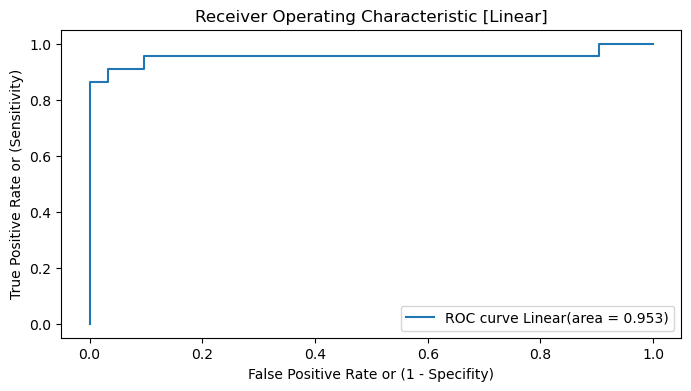

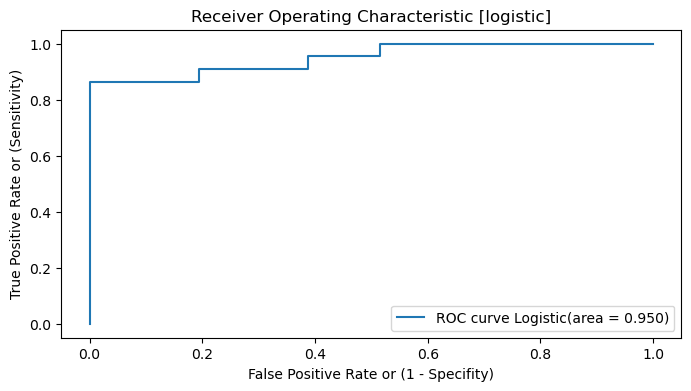

Linear regression Area under curve:  0.9530791788856304  and Logistic regression area under curve 0.9501466275659823


In [88]:
fpr_lin, tpr_lin, threshold_lin = roc_curve(y_test, y_pred)
roc_lin = auc(fpr_lin, tpr_lin)
fpr, tpr, thresholds = roc_curve(y_test, y_prob1[: ,1])
roc_log = auc(fpr, tpr)

plt.figure(figsize=(8, 4))
plt.plot(fpr_lin, tpr_lin, label='ROC curve Linear(area = %0.3f)' % roc_lin)
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic [Linear]')
plt.legend(loc="lower right")
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(fpr, tpr, label='ROC curve Logistic(area = %0.3f)' % roc_log)
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic [logistic]')
plt.legend(loc="lower right")
plt.show()

print("Linear regression Area under curve: ",roc_lin, " and Logistic regression area under curve", roc_log)

### What is the optimal decision threshold to maximize the f1 score? Print the optimal threshold.


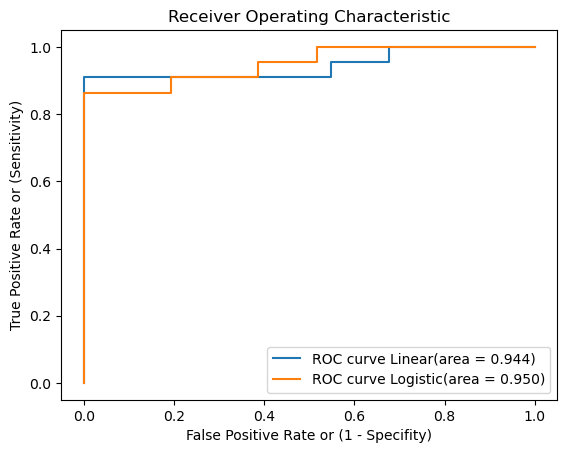

log: [       inf 0.94215934 0.71494244 0.07734458 0.06629817 0.05776565
 0.05599893 0.04723933 0.04649694 0.01334222]
lin: [        inf  1.30685902 -0.42113962 -0.45677463 -0.45733345 -0.45821332
 -0.45824096 -0.46843764]
area under the curve for Linear Reg Model=  0.9442815249266862
area under the curve for Logistic Reg Model=  0.9501466275659823
Optimal Threshold for Linear Model=  0.10787857425251789
Optimal Threshold for Logistic Model=  0.7149424399158105


In [89]:
# Import required packages here
import numpy as np
from typing import Tuple, List
from sklearn.metrics import f1_score

def linear_pred_and_area_under_curve(linear_model, x_test: np.ndarray, y_test: np.ndarray) -> Tuple[np.array, np.array, np.array, np.array, float]:
    '''
        return the tuple consisting the predictions and area under the curve measurements of Linear Regression
        Model in the following order
        [linear_reg_pred, linear_reg_fpr, linear_reg_tpr, linear_threshold, linear_reg_area_under_curve]
        Finally plot the ROC Curve
    '''
    linear_reg_pred = linear_model.predict(x_test)
    linear_reg_fpr, linear_reg_tpr, linear_threshold = roc_curve(y_test, linear_reg_pred)
    linear_reg_area_under_curve = auc(linear_reg_fpr, linear_reg_tpr)
    res = (linear_reg_pred, linear_reg_fpr, linear_reg_tpr, linear_threshold, linear_reg_area_under_curve)
    plt.plot(linear_reg_fpr, linear_reg_tpr, label='ROC curve Linear(area = %0.3f)' % linear_reg_area_under_curve)
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    
    return res

def logistic_pred_and_area_under_curve(logistic_model, x_test: np.ndarray, y_test: np.ndarray) -> Tuple[np.array, np.array, np.array, np.array, float]:
    '''
        return the tuple consisting the predictions and area under the curve measurements of
        Logistic Regression Model in the following order
        [log_reg_pred, log_reg_fpr, log_reg_tpr, log_threshold, log_reg_area_under_curve]
        Finally plot the ROC Curve
    '''
    log_reg_pred = logistic_model.predict_proba(x_test)
    log_reg_fpr, log_reg_tpr, log_threshold = roc_curve(y_test, log_reg_pred[: ,1])
    log_reg_area_under_curve = auc(log_reg_fpr, log_reg_tpr)
    res = (log_reg_pred, log_reg_fpr, log_reg_tpr, log_threshold, log_reg_area_under_curve)
    plt.plot(log_reg_fpr, log_reg_tpr, label='ROC curve Logistic(area = %0.3f)' % log_reg_area_under_curve)
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    return res

linear_y_pred, linear_reg_fpr, linear_reg_tpr, linear_threshold, linear_reg_area_under_curve = linear_pred_and_area_under_curve(model_linear, X_test, y_test)

log_y_pred, log_reg_fpr, log_reg_tpr, log_threshold, log_reg_area_under_curve = logistic_pred_and_area_under_curve(model_logistic, X_test, y_test)

print("log:", log_threshold)
print("lin:",linear_threshold)
print('area under the curve for Linear Reg Model= ', linear_reg_area_under_curve )
print('area under the curve for Logistic Reg Model= ', log_reg_area_under_curve )

linear_optimal_threshold= -1
log_optimal_threshold= -1
'''
  Write code to determine the optimal threshold for linear and logistic regression
  and store them in linear_optimal_threshold and log_optimal_threshold
'''

y_test_predicted_probas = model_logistic.predict_proba(X_test)[: ,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_test_predicted_probas)
numerator = 2 * recall * precision
denom = recall + precision
f1_scores = np.divide(numerator, denom, out=np.zeros_like(denom), where=(denom!=0))
max_f1 = np.max(f1_scores)
max_f1_thresh = thresholds[np.argmax(f1_scores)]
log_optimal_threshold = max_f1_thresh


precision1, recall1, thresholds1 = precision_recall_curve(y_test, linear_y_pred)
numerator1 = 2 * recall1 * precision1
denom1 = recall1 + precision1
f1_scores1 = np.divide(numerator1, denom1, out=np.zeros_like(denom1), where=(denom1!=0))
max_f = np.max(f1_scores1)
max_f_thresh = thresholds[np.argmax(f1_scores1)]
linear_optimal_threshold = max_f_thresh

print('Optimal Threshold for Linear Model= ', linear_optimal_threshold)
print('Optimal Threshold for Logistic Model= ', log_optimal_threshold)

### Five-fold Cross-validation:


In [90]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

def train_test_folds(skf, num_of_folds: int) -> Tuple[np.ndarray, np.ndarray, np.ndarray, dict]:
    '''
        train and test in for loop with different training and test sets obatined from skf.
        use a PENALTY of 12 for logitic regression model for training
        find features in each fold and store them in features_count array.
        populate auc_log and auc_linear arrays with roc_auc_score of each set trained on logistic regression and linear regression models respectively.
        populate f1_log and f1_linear arrays with f1_score of each set trained on logistic regression and linear regression models respectively.
        return features_count, auc_log, auc_linear, f1_log and f1_linear
    '''
    num_of_folds = num_of_folds
    max_iter = 100000008

    X = processed_data.values
    y = labels.values
    auc_log = []
    auc_linear = []
    features_count = []
    f1_log= []
    f1_linear= []

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Train Logistic Regression model with a penalty of 12
        model_logistic = LogisticRegression(C=1/12, max_iter=max_iter)
        model_logistic.fit(X_train, y_train)

        # Calculate ROC AUC and F1-score for Logistic Regression
        y_prob_logistic = model_logistic.predict_proba(X_test)[:, 1]
        log_pred = (y_prob_logistic >= 0.7)
        auc_logistic = roc_auc_score(y_test, y_prob_logistic)
        f1_logistic = f1_score(y_test, log_pred)

        # Train Linear Regression model (you can replace this with your preferred linear model)
        model_linear = LinearRegression()
        model_linear.fit(X_train, y_train)

        # Calculate ROC AUC for Linear Regression (modify as needed)
        y_prob_linear = model_linear.predict(X_test)
        auc_linear_regression = roc_auc_score(y_test, y_prob_linear)
        f1_linear_regression = f1_score(y_test, (y_prob_linear >= 0.107))

        # Store results for this fold
        features_count.append(X_train.shape[1])
        auc_log.append(auc_logistic)
        auc_linear.append(auc_linear_regression)
        f1_log.append(f1_logistic)
        f1_linear.append(f1_linear_regression)

    return features_count, auc_log, auc_linear, f1_log, f1_linear


num_folds= 5
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state= 42)
features_count, auc_log, auc_linear, f1_log, f1_linear = train_test_folds(skf, num_folds)
print(features_count, auc_log, auc_linear, f1_log, f1_linear)

[21, 21, 21, 21, 21] [0.9557142857142857, 0.9185714285714286, 0.9008620689655173, 0.9375, 0.9583333333333333] [0.95, 0.8985714285714286, 0.9166666666666666, 0.9464285714285714, 0.9598214285714286] [0.7499999999999999, 0.7555555555555556, 0.8260869565217391, 0.75, 0.8181818181818182] [0.888888888888889, 0.8679245283018867, 0.8518518518518519, 0.830188679245283, 0.8518518518518519]


### Does the feature count change in each fold


In [91]:
def is_features_count_changed(features_count: np.array) -> bool:
    '''
       compare number of features in each fold (features_count array's each element)
       return true if features count doesn't change in each fold. else return false
    '''
    unique_feature_counts = np.unique(features_count)
    return len(unique_feature_counts) != 1

# call is_features_count_changed function and print true if features count changes in each fold. else print false
print(is_features_count_changed(features_count))

False


In [92]:
import scipy.stats
def mean_confidence_interval(data: np.array, confidence=0.95) -> Tuple[float, float, float]:
    '''
        The required interval is from mean-h to mean+h
        return the tuple consisting of mean, mean-h, mean+h
    '''
    mean = np.mean(data)
    n = len(data)
    stderr = scipy.stats.sem(data)
    margin_of_error = stderr * scipy.stats.t.ppf((1 + confidence) / 2, n - 1)
    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error

    return mean, lower_bound, upper_bound

### Provide a mean and 95% confidence interval for the AUROCs for each model.

In [93]:
auc_linear_mean, auc_linear_open_interval, auc_linear_close_interval = 0, 0, 0
auc_log_mean, auc_log_open_interval, auc_log_close_interval = 0, 0, 0

print('mean and 95% confidence interval for the AUROCs for linear model= '    , mean_confidence_interval(auc_linear))
print('mean and 95% confidence interval for the AUROCs for logistic model= '  , mean_confidence_interval(auc_log))

mean and 95% confidence interval for the AUROCs for linear model=  (0.9342976190476191, 0.9024446367758503, 0.9661506013193879)
mean and 95% confidence interval for the AUROCs for logistic model=  (0.9341962233169129, 0.9037068478844583, 0.9646855987493674)


### Provide a mean and 95% confidence interval for the f1 score for each model.

In [94]:
f1_linear_mean, f1_linear_open_interval, f1_linear_close_interval = 0, 0, 0
f1_log_mean, f1_log_open_interval, f1_log_close_interval = 0, 0, 0

print('mean and 95% confidence interval for the f1 score for linear model= '  , mean_confidence_interval(f1_linear))
print('mean and 95% confidence interval for the f1 score for log model= '  , mean_confidence_interval(f1_log))

mean and 95% confidence interval for the f1 score for linear model=  (0.8581411600279525, 0.8310684062660717, 0.8852139137898333)
mean and 95% confidence interval for the f1 score for log model=  (0.7799648660518226, 0.7319581169679278, 0.8279716151357174)
